# Solution of Programming Exercise 2 - Group N

<p>Authors: Jairo R Mejía and Pablo Gomez.</p>

## Problem 1 (20 pts)

Problem 1.(20pts)



(a) (15pts)

(I)(5pts)

In [4]:
import numpy as np
import random as ra
from scipy.stats import multivariate_normal, uniform
import matplotlib.pyplot as plt

p = lambda x1,x2: np.exp(-((100*(x2-x1**2)**2)+(1-x1)**2)/20)
L = 5000
cov = np.array([[0.5**2, 0],[0, 0.5**2]])

We define the Rosenbrock functions and the Metropolis algorithm. As in this exercise we will only be asked to vary the covariance matrix, the only parameter we will introduce in the Metropolis algorithm will be the sigma.


On the other hand, this exercise has also been solved using the explicit code to demonstrate the understanding of the algorithm.

In [5]:
def rosenbrock(x1,x2):
    return np.exp(-((100 * (x2 - x1**2)**2) + (1 - x1)**2)/20)

def metropolis_execise(sigma):
    cov = np.array([[sigma**2, 0],[0, sigma**2]])
    
    number_reject=0
    number_accept=0
    mean=np.array([0,10])
    iteracion = mean
    sample = mean
    for i in range(L):
    
        distr = multivariate_normal(cov = cov, mean = mean)
        propuesta = distr.rvs(size=1)
    
        prob = rosenbrock(propuesta[0],propuesta[1])/rosenbrock(mean[0],mean[1])
        random = uniform(0,1)
    
        if prob >= random.rvs(1):
            iteracion =np.vstack([sample,propuesta])
            sample =np.vstack([sample,propuesta])
            mean = propuesta
            number_accept=number_accept+1
        else:
            number_reject = number_reject+1
            iteracion = np.vstack([sample,mean])
    
    return sample, number_accept / L

In [352]:
sample, ratio_accept= metropolis_execise(0.1)
print(sample)

[[ 0.         10.        ]
 [-0.14491209  9.97102972]
 [-0.16290943  9.85631762]
 ...
 [-1.07567965  1.03901828]
 [-1.01870079  1.0294409 ]
 [-0.93647986  0.9830391 ]]


We code the Metropolis Hastings algorithm and obtain a sequence.

In [236]:
number_reject=0
number_accept=0
mean=np.array([0,10])
iteracion = mean
sample = mean

for i in range(L):
    
    distr = multivariate_normal(cov =cov, mean=mean)
    propuesta = distr.rvs(size=1)
    
    prob = p(propuesta[0],propuesta[1])/p(mean[0],mean[1])
    random = uniform(0,1)
    
    if prob >= random.rvs(1):
        iteracion =np.vstack([sample,propuesta])
        sample =np.vstack([sample,propuesta])
        mean = propuesta
        number_accept=number_accept+1
    else:
        number_reject = number_reject+1
        iteracion = np.vstack([sample,mean])
        
print(iteracion)

[[ 0.         10.        ]
 [-0.04743085 10.00058089]
 [-0.07698732  9.98150084]
 ...
 [-3.78871771 14.29448338]
 [-3.74640003 14.22341502]
 [-3.74640003 14.22341502]]


1(II) (5 pts)

We create the plot to obsevate the the evolution of sample and we can guess how is the distribution.

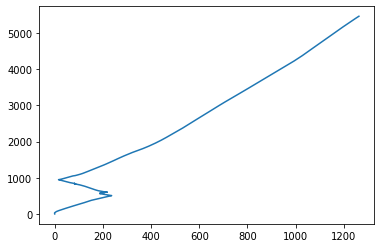

In [217]:
path = iteracion
for n in range(iteracion.shape[0]-1):
    iteracion[n+1] += iteracion[n]
    
plt.title("The Evolution of Each Coordinate VS Iteration", fontweight="bold", size=16)
plt.xlabel('Two Dimension Distribution', size=14)
plt.ylabel('Step by Step',size=14)

plt.plot(*iteracion.T)
plt.show()

(III) (5pts)

We desing the code to obtein the samples from different sigma.

It is also possible to obtain the samples with the previously defined functions.

In [218]:
number_reject_total=np.zeros(21)
number_accept_total=np.zeros(21)
ratio_accept_total =np.zeros(21)

for j in range(21):

    cov = np.array([[(j*0.05+0.05)**2, 0],[0,(j*0.05+0.05)**2]])
    
    
    number_reject=0
    number_accept=0
    mean=np.array([0,10])
    iteracion = mean
    sample = mean
    
    for i in range(L):
    
        distr = multivariate_normal(cov =cov, mean=mean)
        propuesta = distr.rvs(size=1)
    
        prob = p(propuesta[0],propuesta[1])/p(mean[0],mean[1])
        random = uniform(0,1)
    
        if prob >= random.rvs(1):
            iteracion =np.vstack([sample,propuesta])
            sample =np.vstack([sample,propuesta])
            mean = propuesta
            number_accept=number_accept+1
        else:
            number_reject = number_reject+1
            iteracion = np.vstack([sample,mean])
    
    number_reject_total[j]=number_reject
    number_accept_total[j]=number_accept
    ratio_accept_total[j]=number_accept/5000
    

        


In [353]:
ratio_accept_total=np.zeros(21)
for j in range(21):

    sigma = j*0.05+0.05
    samples, ratio_accept = metropolis_execise(sigma)
    ratio_accept_total[j] =ratio_accept
    
    
    

Now we make the plot of how change sigma.

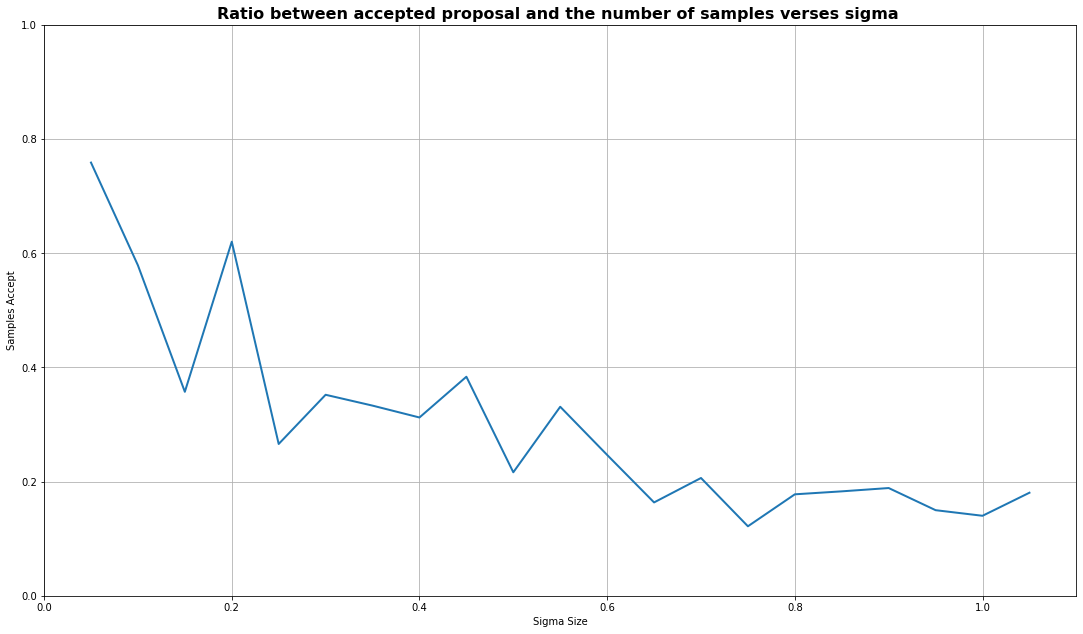

In [221]:

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(np.linspace(0.05, 1.05, 21), ratio_accept_total, linewidth=2.0)
ax.set(xlim=(0, 1.1), ylim=(0, 1))

plt.title("Ratio between accepted proposal and the number of samples verses sigma ", fontweight="bold", size=16)
plt.xlabel('Sigma Size')
plt.ylabel('Samples Accept') 


plt.grid()
plt.show()

1(b) (5pts)

First let's have the samples for the different sigmas: 0.1, 0.5, 1

In [313]:
samples01 = metropolis_execise(0.1)
samples05 = metropolis_execise(0.5)
samples1  = metropolis_execise(1)


We define the given function for the calculation of the autocorrelation.

In [305]:
def rk(k,samples):
    #that´s the funtion to calculate autocorrelation.
    
    mean = np.mean(samples,0)
    b0=0
    b1=0
    c0=0
    c1=0
    L = np.size(samples01,0)
    a=1/(L-k)
    
    
    for i in range(L-k):
        b0 = b0+(samples[i][0]-mean[0])*(samples[i+k][0]-mean[0])
        b1 = b1+(samples[i][1]-mean[1])*(samples[i+k][1]-mean[1])
    
    
    
    for j in range(L):
        c0 = c0+(samples[i][0]-mean[0])**2
        c1 = c1+(samples[i][1]-mean[1])**2
            
    a = (a*b0)/(c0/L)
    b = (a*b1)/(c1/L)
    return a,b
        
        
    

Ahora calculamos los diferentes valores de rk.

In [329]:
correlation01X=np.zeros(2000)
correlation01Y=np.zeros(2000)
correlation05X=np.zeros(2000)
correlation05Y=np.zeros(2000)
correlation1X=np.zeros(20000)
correlation1Y=np.zeros(2000)
for k in range(2000):
    correlation01X, correllation01Y= rk(k=k,samples=samples01)
    correlation05X, correllation05Y= rk(k=k,samples=samples05)
    correlation1X, correllation1Y= rk(k=k,samples=samples1)


IndexError: index 713 is out of bounds for axis 0 with size 713

Finally, we plot the autocorrelation graphs.